**Introduction** 

In this assignment, you will use various Python libraries to create data visualization. You will work with pandas to import, merge, clean, and analyze the data, then use Matplotlib for data visualization. In class, you worked on a dataset of immigrants to Canada published by the UN. In this lab, you will be working on two datasets from the USA and Canada

**Questions**

1. Look up the 5 countries with the largest number of immigrants to Canada. (Sum the total number of emigrants from 1980 to 2013 coming from each country. Then sort from largest to smallest. )
2. Add a “total” row for each year.
3. Plot all 5 countries with largest emmigrants and total across different years (There will be 6 Lines, 5 for the countries and 1 for the total.)
4. In which year the maximum number of people have immigrated from these 5 countries to Canada? (Total line will show the answer)  Add annotation to the maximum point and name it “Maximum”.
5. Repeat the above steps for USA data (This time use USA data instead of Canada)

**Submission**

Turn in your solution in a notebook file on iCollege by 11:59pm Friday Oct. 22, 2021



In [4]:
#Download the dataset
!pip install gdown
!gdown https://drive.google.com/uc?id=16vZpn51OWRyTPSMmSrwF4HySFEdCVS3d
!gdown https://drive.google.com/uc?id=1NYp-nCPhMZPBEhJ__5znZrHAdGZ6x-T3


You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/urllib3/connectionpool.py", line 699, in urlopen
    httplib_response = self._make_request(
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/urllib3/connectionpool.py", line 382, in _make_request
    self._validate_conn(conn)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/urllib3/connectionpool.py", line 1010, in _validate_conn
    conn.connect()
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/urllib3/connection.py", line 411, in connect
    self.sock = ssl_wrap_socket(
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/urllib3/util/ssl_.py", line 449, in ssl_wrap_socket
    ssl_sock = _ssl_wrap_socket_impl(
  File "/Libr

In [2]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

In [5]:
df_can = pd.read_excel(
    './Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)

print('Data for Canada read into a pandas dataframe!')

df_usa = pd.read_excel(
    './USA.xlsx',
    sheet_name='USA by Place of birth',
    skiprows=range(20),
    skipfooter=2)
print('Data for USA read into a pandas dataframe!')

Data for Canada read into a pandas dataframe!
Data for USA read into a pandas dataframe!


# Canada

In [31]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [103]:
# remove unnecessary rows 
df_can.drop(['Type','Coverage','AREA','REG','DEV','AreaName','RegName','DevName'], axis=1, inplace=True)
df_can.rename(columns={'OdName':'Country'}, inplace=True)

In [1]:
# sum each year from 1980 to 2013 and sort by number of immigrants 
df_can['Total'] = df_can.sum(axis=1) 
df_can.sort_values('Total', ascending=False, inplace=True)

NameError: name 'df_can' is not defined

In [105]:
can_top5 = df_can.iloc[:,:-1].head()
can_top5

,Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
79,India,8880,8670,8147,7338,5704,4211,7150,10189,11522,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
36,China,5123,6682,3308,1863,1527,1816,1960,2643,2758,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
183,United Kingdom of Great Britain and Northern I...,22045,24796,20620,10015,10170,9564,9470,21337,27359,...,7533,7258,7140,8216,8979,8876,8724,6204,6195,5827
136,Philippines,6051,5921,5249,4562,3801,3150,4166,7360,8639,...,14004,18139,18400,19837,24887,28573,38617,36765,34315,29544
130,Pakistan,978,972,1201,900,668,514,691,1072,1334,...,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603


In [106]:
can_top5 = can_top5.append(can_top5.sum(axis=0, numeric_only=True), ignore_index=True)
can_top5.iloc[5,0] = 'Total'
can_top5.set_index('Country', inplace=True)

In [107]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [108]:
%matplotlib inline

In [109]:
can_top5

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
India,8880.0,8670.0,8147.0,7338.0,5704.0,4211.0,7150.0,10189.0,11522.0,10343.0,...,28235.0,36210.0,33848.0,28742.0,28261.0,29456.0,34235.0,27509.0,30933.0,33087.0
China,5123.0,6682.0,3308.0,1863.0,1527.0,1816.0,1960.0,2643.0,2758.0,4323.0,...,36619.0,42584.0,33518.0,27642.0,30037.0,29622.0,30391.0,28502.0,33024.0,34129.0
United Kingdom of Great Britain and Northern Ireland,22045.0,24796.0,20620.0,10015.0,10170.0,9564.0,9470.0,21337.0,27359.0,23795.0,...,7533.0,7258.0,7140.0,8216.0,8979.0,8876.0,8724.0,6204.0,6195.0,5827.0
Philippines,6051.0,5921.0,5249.0,4562.0,3801.0,3150.0,4166.0,7360.0,8639.0,11865.0,...,14004.0,18139.0,18400.0,19837.0,24887.0,28573.0,38617.0,36765.0,34315.0,29544.0
Pakistan,978.0,972.0,1201.0,900.0,668.0,514.0,691.0,1072.0,1334.0,2261.0,...,13399.0,14314.0,13127.0,10124.0,8994.0,7217.0,6811.0,7468.0,11227.0,12603.0
Total,43077.0,47041.0,38525.0,24678.0,21870.0,19255.0,23437.0,42601.0,51612.0,52587.0,...,99790.0,118505.0,106033.0,94561.0,101158.0,103744.0,118778.0,106448.0,115694.0,115190.0


In [117]:
print(can_top5.loc['Total'].idxmax(), can_top5.loc['Total'].max())

2010 118778.0


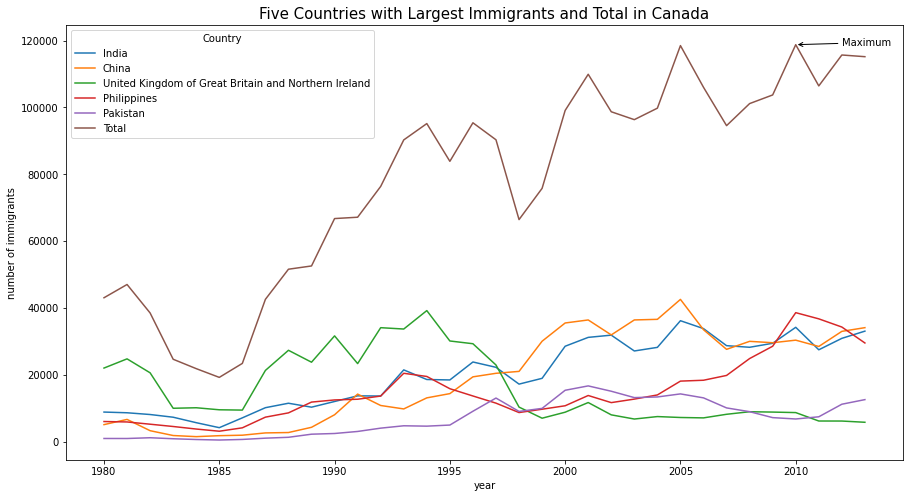

In [295]:
can_top5.transpose().plot(figsize=(15,8))
plt.ylabel('number of immigrants')
plt.xlabel('year')
plt.title('Five Countries with Largest Immigrants and Total in Canada',
          fontsize = 15)
plt.annotate('Maximum', xy=(2010,118778), xycoords='data',xytext=(2012,118500), arrowprops=dict(arrowstyle="->",facecolor='black'))
plt.show()

# USA

In [6]:
df_usa

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Less developed regions,722,...,2137,4749,3417,1753,2813,3165,2017,1648,1617,2196
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,More developed regions,30,...,3840,5947,7914,5737,5754,5137,4711,3612,3364,3186
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Less developed regions,175,...,805,1115,1300,1036,1037,1485,1305,1364,1369,1241
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Less developed regions,0,...,12,15,28,11,14,19,14,D,-,D
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,More developed regions,2,...,..,..,..,..,..,..,..,..,..,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,Immigrants,Foreigners,Wallis and Futuna Islands,909,Oceania,957,Polynesia,902,Less developed regions,0,...,..,..,..,..,..,..,..,..,..,..
215,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Less developed regions,0,...,..,..,..,..,..,..,..,..,..,..
216,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Less developed regions,160,...,1760,3366,4308,2396,1872,3134,3591,3361,2620,3532
217,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Less developed regions,178,...,359,499,672,576,613,704,628,652,643,505


In [218]:
# remove unnecessary rows 
df_usa.drop(['Type','Coverage','AREA','REG','DEV','AreaName','RegName','DevName'], axis=1, inplace=True)
df_usa.rename(columns={'OdName':'Country'}, inplace=True)
df_usa.head()

,Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,722,1881,1569,2566,3222,2794,2831,2424,2873,...,2137,4749,3417,1753,2813,3165,2017,1648,1617,2196
1,Albania,30,11,23,22,32,45,53,62,82,...,3840,5947,7914,5737,5754,5137,4711,3612,3364,3186
2,Algeria,175,184,190,201,197,202,183,172,199,...,805,1115,1300,1036,1037,1485,1305,1364,1369,1241
3,American Samoa,0,0,7,7,0,0,0,1,0,...,12,15,28,11,14,19,14,D,-,D
4,Andorra,2,3,2,1,0,0,1,0,0,...,..,..,..,..,..,..,..,..,..,..


In [254]:
total = []
for i in range(len(df_usa)):
  total.append(pd.to_numeric(df_usa.loc[i], errors='coerce').sum())
total = pd.Series(total)

In [256]:
df_usa['Total'] = total
df_usa.sort_values('Total', ascending=False, inplace=True)
df_usa.head()

,Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
125,Mexico,56680,101268,56106,59079,57557,61077,66533,72351,95039,...,161445,173749,148640,189989,164920,139120,143446,146406,135028,6078548.0
153,Philippines,42316,43772,45102,41546,42768,47978,52558,50060,50697,...,60746,74606,72596,54030,60029,58173,57011,57327,54446,1798872.0
41,China,27651,25803,27100,25777,23363,24787,25106,25841,28717,...,69933,87307,76655,80271,64238,70863,87016,81784,71798,1625912.0
91,India,22607,21522,21738,25451,24964,26026,26227,27803,26268,...,84680,61369,65353,63352,57304,69162,69013,66434,68458,1533776.0
213,Viet Nam,43483,55631,72553,37560,37236,31895,29993,24231,25789,...,32784,30691,28691,31497,29234,30632,34157,28304,27101,1261426.0


In [278]:
usa_top5 = df_usa.iloc[:,:-1].head()

In [279]:
usa_top5 = usa_top5.append(usa_top5.sum(axis=0), ignore_index=True)
usa_top5.iloc[5,0] = 'Total'
usa_top5.set_index('Country', inplace=True)

In [291]:
usa_top5 = usa_top5.astype('int64')

In [292]:
print(usa_top5.loc['Total'].idxmax(), usa_top5.loc['Total'].max())

1991 1143159


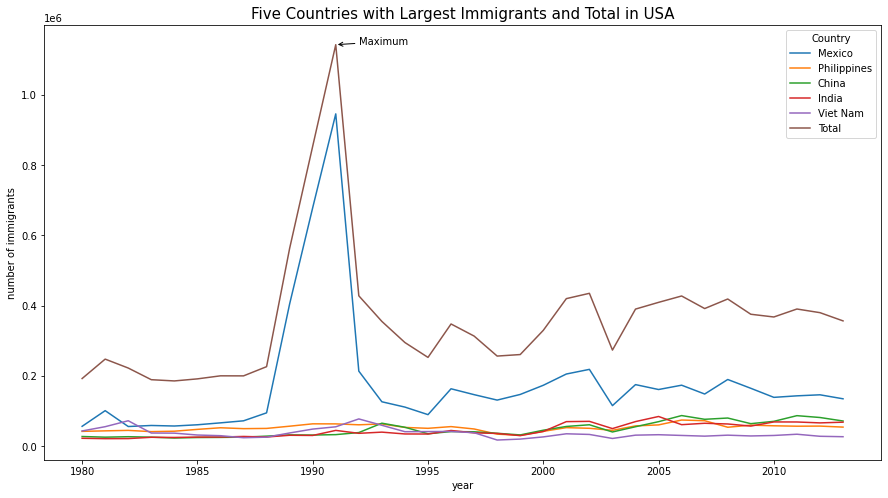

In [296]:
usa_top5.transpose().plot(figsize=(15,8))
plt.ylabel('number of immigrants')
plt.xlabel('year')
plt.title('Five Countries with Largest Immigrants and Total in USA',
          fontsize = 15)
plt.annotate('Maximum', xy=(1991,1143159), xycoords='data',xytext=(1992,1143159), arrowprops=dict(arrowstyle="->",facecolor='black'))
plt.show()